## Deconvolve microtubules phantom

In this example we use clij2fft richardson lucy to deconvolve the microtubules phantom from here http://bigwww.epfl.ch/deconvolution/data/microtubules/

The purpose of this example is to show the effect of regularization

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from tnia.plotting.projections import show_xyz_max

In [2]:
from decon_helper import image_path

image_name = image_path / 'microtubules/input.tif'
psf_name = image_path / 'microtubules/psf.tif'
truth_name = image_path / 'microtubules/ground-truth.tif'


tnia available
stackview available


In [3]:
im=imread(image_name)
psf=imread(psf_name)
truth=imread(truth_name)

# crop PSF to make decon a bit faster 

In [4]:
from tnia.nd.ndutil import centercrop
psf=centercrop(psf, (128,128,128))
psf.shape

(128, 128, 128)

In [5]:
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc

In [6]:
iterations = 500
decon_tv_0=richardson_lucy_nc(im, psf, iterations, 0)
decon_tv_0001=richardson_lucy_nc(im, psf, iterations, 0.0001)
decon_tv_001=richardson_lucy_nc(im, psf, iterations, 0.001)

get lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 
Richardson Lucy Finished

In [14]:
from tnia.metrics.errors import RMSE
import pandas as pd
df=pd.DataFrame(columns=['method','RMSE'])


df.loc[len(df.index)]=['truth',RMSE(truth,truth)]
df.loc[len(df.index)]=['image ',RMSE(truth,im)]
df.loc[len(df.index)]=['decon rf=0 ',RMSE(truth,decon_tv_0)]
df.loc[len(df.index)]=['decon rf=0.0001 ',RMSE(truth,decon_tv_0001)]
df.loc[len(df.index)]=['decon rf=0.001 ',RMSE(truth,decon_tv_001)]
                      
df.style.hide(axis='index')

In [7]:
# show in napari
import napari
viewer = napari.Viewer()
viewer.add_image(im, name='image')
viewer.add_image(decon_tv_0, name='decon rf=0')
viewer.add_image(decon_tv_0001, name='decon rf=0.0001')
viewer.add_image(decon_tv_001, name='decon rf=0.001')
viewer.add_image(truth, name='truth')

<Image layer 'truth' at 0x7eff2b04d340>

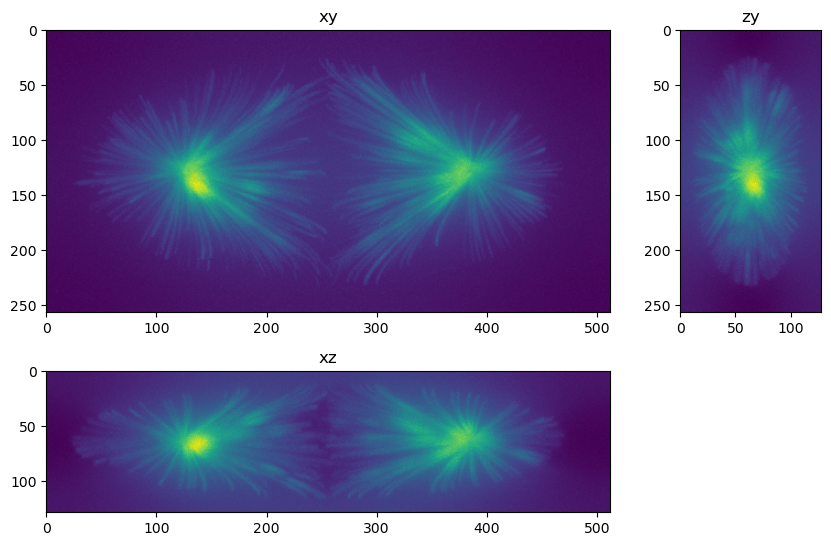

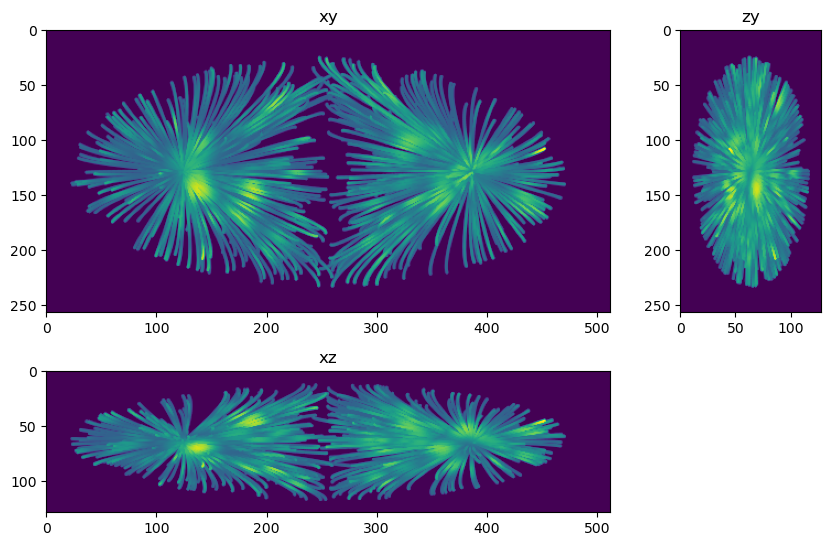

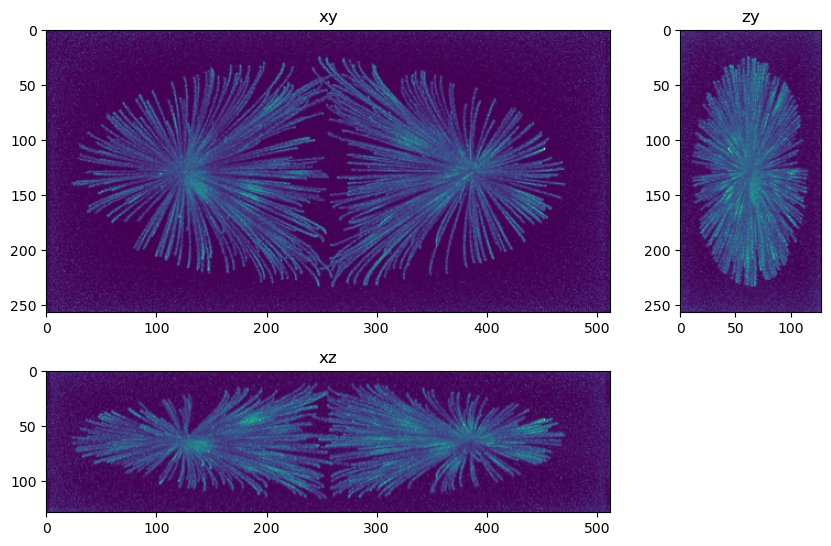

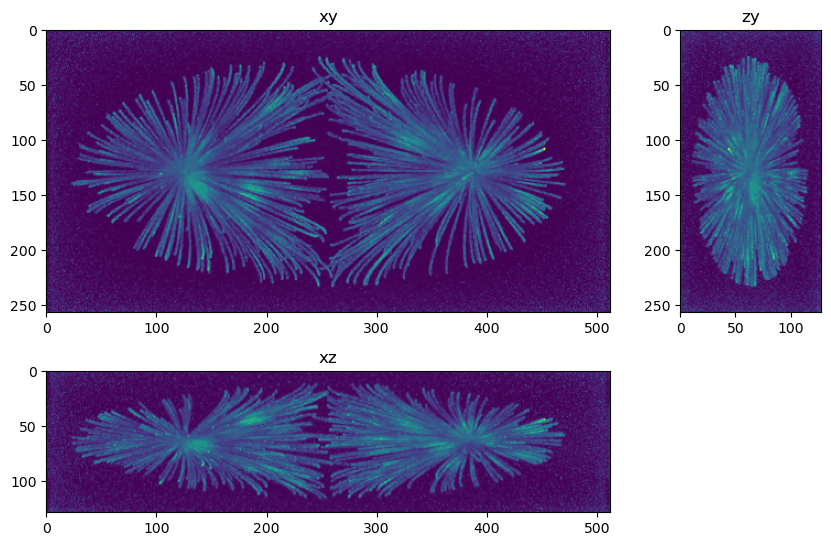

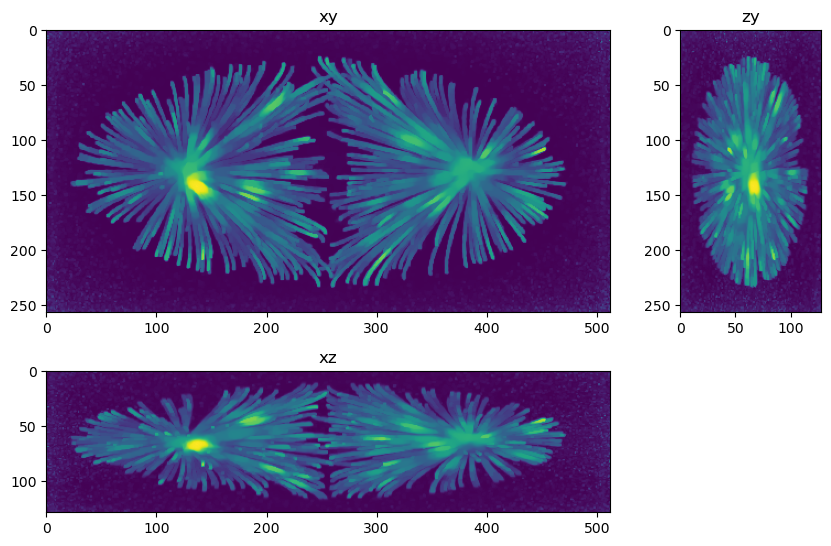

In [16]:
from tnia.plotting.projections import show_xyz_max
fig=show_xyz_max(im,figsize=(10,7))
fig=show_xyz_max(truth,figsize=(10,7))
fig=show_xyz_max(decon_tv_0,figsize=(10,7))
fig=show_xyz_max(decon_tv_0001,figsize=(10,7))
fig=show_xyz_max(decon_tv_001,figsize=(10,7))

## Questions and exercises

1.  How would you write python code to test a combination of iteration numbers and regularization factors to study the effect of the two?  
2.  Write code that crops a smaller subsection of the image (to increase the speed we can perform experiments) and test iteration number of 1000, 2000 and 5000 and regularization factor of 0.000, 0.0001, and 0.0001.  (Make sure the cropped area still contains structure)